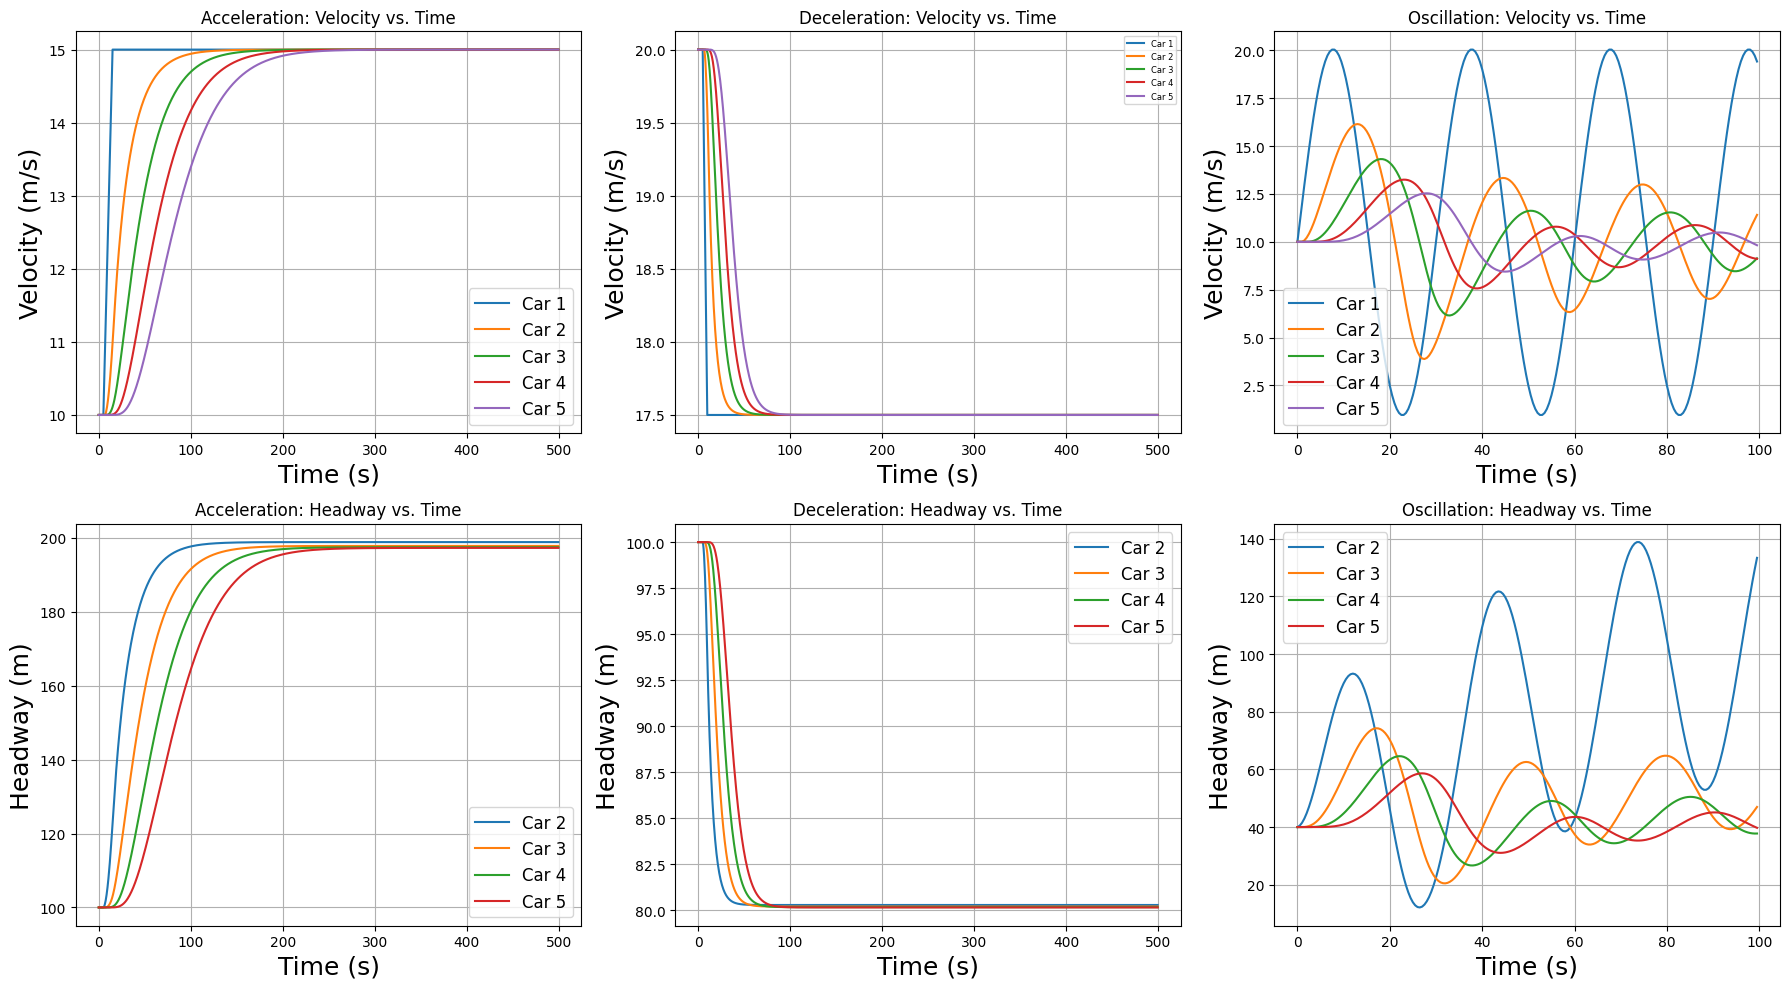

In [103]:
import numpy as np
import matplotlib.pyplot as plt

def run_simulation(num_cars, road_length, time_steps, dt, tau, alpha, m, l, speed_limit, initial_speed, acc_lead_func):
    k = int(tau / dt)
    initial_gap = road_length / num_cars
    positions = np.array([0 - i * initial_gap for i in range(num_cars)])
    speeds = np.full(num_cars, initial_speed)
    accelerations = np.zeros(num_cars)
    collision_threshold = 0.1  # Fixed parameter
    
    positions_history = [positions.copy()]
    speeds_history = [speeds.copy()]
    gaps_history = []
    
    def compute_acceleration(i, t):
        prev = i - 1
        if t < k:
            gap = positions[prev] - positions[i]
            v_i = speeds[i]
            v_prev = speeds[prev]
        else:
            pos_delayed = positions_history[t - k]
            speeds_delayed = speeds_history[t - k]
            gap = pos_delayed[prev] - pos_delayed[i]
            v_i = speeds_delayed[i]
            v_prev = speeds_delayed[prev]
        if gap < collision_threshold:
            return -v_i / dt
        if v_i >= speed_limit:
            return 0.0
        return alpha * (v_i**m / (gap**l)) * (v_prev - v_i)
    
    for t in range(time_steps):
        gaps = np.zeros(num_cars)
        for i in range(1, num_cars):
            gaps[i] = positions[i-1] - positions[i]
        gaps[0] = float('inf')
        gaps_history.append(gaps.copy())
        
        new_acc = np.zeros(num_cars)
        new_acc[0] = acc_lead_func(t)
        for i in range(1, num_cars):
            new_acc[i] = compute_acceleration(i, t)
        
        speeds = speeds + new_acc * dt
        speeds = np.clip(speeds, 0, speed_limit)
        positions = positions + speeds * dt
        accelerations = new_acc
        
        positions_history.append(positions.copy())
        speeds_history.append(speeds.copy())
    
    positions_history = np.array(positions_history[:-1])
    speeds_history = np.array(speeds_history[:-1])
    gaps_history = np.array(gaps_history)
    time_seconds = np.arange(time_steps) * dt
    return time_seconds, speeds_history, gaps_history
# Acceleration Parameters
num_cars =5
road_length_accel = 500
time_steps = 1000
dt = 0.5
tau_accel = 1
alpha_accel = 0.6
m = 1
l = 1
speed_limit_accel = 15
initial_speed_accel = 10
disturbance_time = 10
a_accel = 0.5
accel_duration = 30
acc_lead_accel = lambda t: a_accel if disturbance_time <= t < disturbance_time + accel_duration else 0.0

time_seconds_accel, speeds_history_accel, gaps_history_accel = run_simulation(
    num_cars, road_length_accel, time_steps, dt, tau_accel, alpha_accel, m, l,
    speed_limit_accel, initial_speed_accel, acc_lead_accel
)
# Deceleration Parameters
speed_limit_decel = 30
initial_speed_decel = 20
a_decel = -0.5
decel_duration = 10
acc_lead_decel = lambda t: a_decel if disturbance_time <= t < disturbance_time + decel_duration else 0.0

time_seconds_decel, speeds_history_decel, gaps_history_decel = run_simulation(
    num_cars, road_length_accel, time_steps, dt, tau_accel, alpha_accel, m, l,
    speed_limit_decel, initial_speed_decel, acc_lead_decel
)
# Oscillation Parameters
road_length_osc = 200
tau_osc = 0.5
alpha_osc = 0.6
speed_limit_osc = 25
initial_speed_osc = 10
time_step_os=200
A = 2
T = 60
acc_lead_osc = lambda t: A * np.cos(2 * np.pi * t / T)

time_seconds_osc, speeds_history_osc, gaps_history_osc = run_simulation(
    num_cars, road_length_osc, time_step_os, dt, tau_osc, alpha_osc, m, l,
    speed_limit_osc, initial_speed_osc, acc_lead_osc
)
# Create figure with 2 rows and 3 columns
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Acceleration Plots
for i in range(num_cars):
    axs[0, 0].plot(time_seconds_accel, speeds_history_accel[:, i], label=f'Car {i+1}')
axs[0, 0].set_title("Acceleration: Velocity vs. Time")
axs[0, 0].set_xlabel("Time (s)",fontsize='18')
axs[0, 0].set_ylabel("Velocity (m/s)",fontsize='18')
axs[0, 0].legend(fontsize=6,prop={'size':12})
axs[0, 0].grid()

for i in range(1, num_cars):
    axs[1, 0].plot(time_seconds_accel, gaps_history_accel[:, i], label=f'Car {i+1}')
axs[1, 0].set_title("Acceleration: Headway vs. Time")
axs[1, 0].set_xlabel("Time (s)",fontsize='18')
axs[1, 0].set_ylabel("Headway (m)",fontsize='18')
axs[1, 0].legend(fontsize=6,prop={'size':12})
axs[1, 0].grid()

# Deceleration Plots
for i in range(num_cars):
    axs[0, 1].plot(time_seconds_decel, speeds_history_decel[:, i], label=f'Car {i+1}')
axs[0, 1].set_title("Deceleration: Velocity vs. Time")
axs[0, 1].set_xlabel("Time (s)",fontsize='18')
axs[0, 1].set_ylabel("Velocity (m/s)",fontsize='18')
axs[0, 1].legend(fontsize=6)
axs[0, 1].grid()

for i in range(1, num_cars):
    axs[1, 1].plot(time_seconds_decel, gaps_history_decel[:, i], label=f'Car {i+1}')
axs[1, 1].set_title("Deceleration: Headway vs. Time")
axs[1, 1].set_xlabel("Time (s)",fontsize='18')
axs[1, 1].set_ylabel("Headway (m)",fontsize='18')
axs[1, 1].legend(fontsize=6,prop={'size':12})
axs[1, 1].grid()

# Oscillation Plots
for i in range(num_cars):
    axs[0, 2].plot(time_seconds_osc, speeds_history_osc[:, i], label=f'Car {i+1}')
axs[0, 2].set_title("Oscillation: Velocity vs. Time")
axs[0, 2].set_xlabel("Time (s)",fontsize='18')
axs[0, 2].set_ylabel("Velocity (m/s)",fontsize='18')
axs[0, 2].legend(fontsize=6,prop={'size':12})
axs[0, 2].grid()

for i in range(1, num_cars):
    axs[1, 2].plot(time_seconds_osc, gaps_history_osc[:, i], label=f'Car {i+1}')
axs[1, 2].set_title("Oscillation: Headway vs. Time")
axs[1, 2].set_xlabel("Time (s)",fontsize='18')
axs[1, 2].set_ylabel("Headway (m)",fontsize='18')
axs[1, 2].legend(fontsize=6,prop={'size':12})
axs[1, 2].grid()

plt.tight_layout()
plt.show()


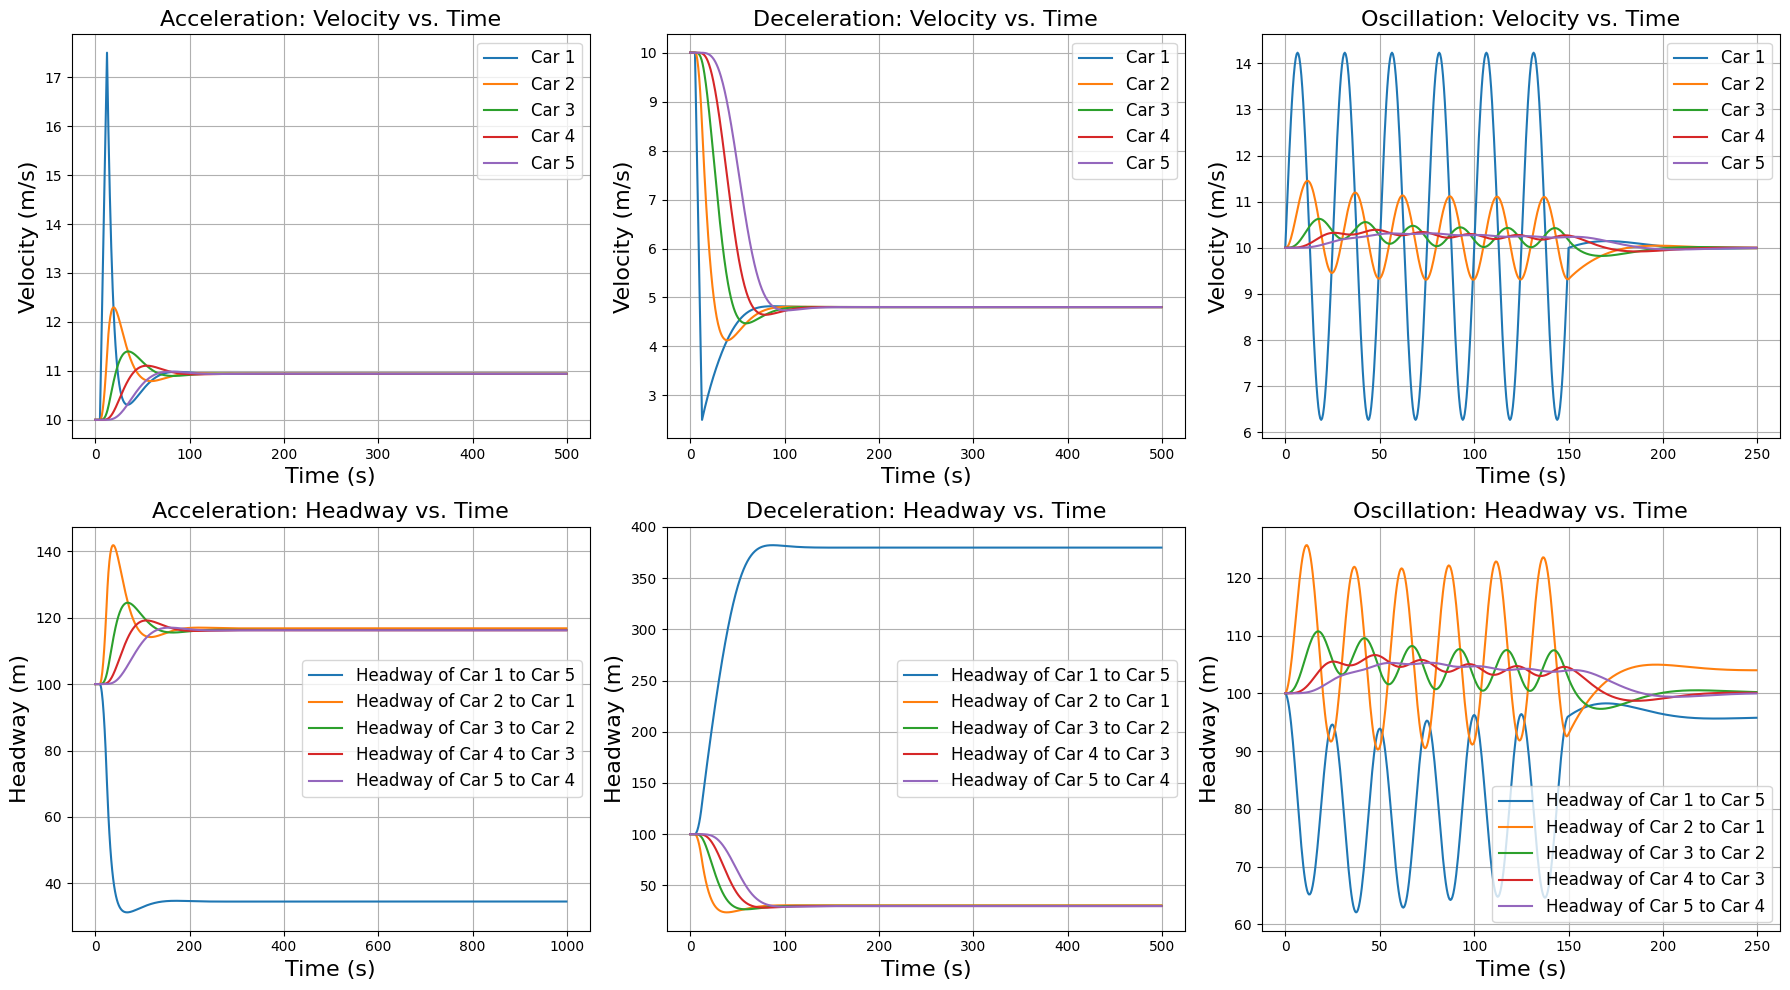

In [104]:
import numpy as np
import matplotlib.pyplot as plt

def run_simulation(num_cars, road_length, time_steps, dt, tau, alpha, m, l, speed_limit, initial_speed, acc_lead_func):
    k = int(tau / dt)
    collision_threshold = 0.1
    positions = np.linspace(0, road_length, num_cars, endpoint=False)
    speeds = np.full(num_cars, initial_speed)
    accelerations = np.zeros(num_cars)
    
    positions_history = [positions.copy()]
    speeds_history = [speeds.copy()]
    gaps_history = []
    
    def compute_acceleration(i, t):
        prev = (i - 1) % num_cars
        if t < k:
            gap = (positions[i] - positions[prev]) % road_length
            v_i = speeds[i]
            v_prev = speeds[prev]
        else:
            pos_delayed = positions_history[t - k]
            speeds_delayed = speeds_history[t - k]
            gap = (pos_delayed[i] - pos_delayed[prev]) % road_length
            v_i = speeds_delayed[i]
            v_prev = speeds_delayed[prev]
        if gap < collision_threshold:
            return -v_i / dt  # Adjusted to match your emergency braking logic
        if v_i >= speed_limit:
            return 0.0
        return alpha * (v_i**m / (gap**l)) * (v_prev - v_i)
    
    for t in range(time_steps):
        gaps = np.zeros(num_cars)
        for i in range(num_cars):
            prev = (i - 1) % num_cars
            gaps[i] = (positions[i] - positions[prev]) % road_length
        gaps_history.append(gaps.copy())
        
        new_acc = np.zeros(num_cars)
        new_acc[0] = acc_lead_func(t, gaps[0], compute_acceleration)
        for i in range(1, num_cars):
            new_acc[i] = compute_acceleration(i, t)
        
        speeds = speeds + new_acc * dt
        speeds = np.clip(speeds, 0, speed_limit)
        positions = (positions - speeds * dt) % road_length
        accelerations = new_acc
        
        positions_history.append(positions.copy())
        speeds_history.append(speeds.copy())
    
    time_seconds = np.arange(time_steps) * dt
    return time_seconds, np.array(speeds_history[:-1]), np.array(gaps_history)
# Common Parameters
num_cars = 5
road_length = 500
time_steps = 1000
dt = 0.5
tau = 0.2
alpha = 0.6
m = 1
l = 1
speed_limit = 30
initial_speed = 10
disturbance_time = 10

# Acceleration Specific
a_accel = 1
accel_duration = 15
acc_lead_accel = lambda t, gap, comp_acc: a_accel if disturbance_time <= t < disturbance_time + accel_duration else comp_acc(0, t)

time_seconds_accel, speeds_accel, gaps_accel = run_simulation(
    num_cars, road_length, time_steps, dt, tau, alpha, m, l,
    speed_limit, initial_speed, acc_lead_accel
)
# Deceleration Specific
a_decel = -1
decel_duration = 15
acc_lead_decel = lambda t, gap, comp_acc: a_decel if disturbance_time <= t < disturbance_time + decel_duration else comp_acc(0, t)

time_seconds_decel, speeds_decel, gaps_decel = run_simulation(
    num_cars, road_length, time_steps, dt, tau, alpha, m, l,
    speed_limit, initial_speed, acc_lead_decel
)
# Oscillation Specific
num_cars_osc = 5
tau_osc = 0.2
A = 1
T = 50
time_step_os=500
fluctuation_duration = 300
acc_lead_osc = lambda t, gap, comp_acc: (
    comp_acc(0, t) if t >= fluctuation_duration or gap < 50 else A * np.cos(2 * np.pi * t / T)
)

time_seconds_osc, speeds_osc, gaps_osc = run_simulation(
    num_cars_osc, road_length, time_step_os, dt, tau_osc, alpha, m, l,
    speed_limit, initial_speed, acc_lead_osc
)
# Create 2x3 subplot grid
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Acceleration Plots
for i in range(num_cars):
    axs[0, 0].plot(time_seconds_accel, speeds_accel[:, i], label=f'Car {i+1}')
axs[0, 0].set_title("Acceleration: Velocity vs. Time",fontsize=16)
axs[0, 0].set_xlabel("Time (s)",fontsize=16)
axs[0, 0].set_ylabel("Velocity (m/s)",fontsize=16)
axs[0, 0].legend(fontsize=6,prop={'size':12})
axs[0, 0].grid()

for i in range(num_cars):
    prev_car = (i - 1) % num_cars + 1  
    current_car = i + 1               
    axs[1, 0].plot(time_axis, gaps_accel[:, i], label=f'Headway of Car {current_car} to Car {prev_car}')
axs[1, 0].set_title("Acceleration: Headway vs. Time",fontsize=16)
axs[1, 0].set_xlabel("Time (s)",fontsize=16)
axs[1, 0].set_ylabel("Headway (m)",fontsize=16)
axs[1, 0].legend(fontsize=6,prop={'size':12})
axs[1, 0].grid()

# Deceleration Plots
for i in range(num_cars):
    axs[0, 1].plot(time_seconds_decel, speeds_decel[:, i], label=f'Car {i+1}')
axs[0, 1].set_title("Deceleration: Velocity vs. Time",fontsize=16)
axs[0, 1].set_xlabel("Time (s)",fontsize=16)
axs[0, 1].set_ylabel("Velocity (m/s)",fontsize=16)
axs[0, 1].legend(fontsize=6,prop={'size':12})
axs[0, 1].grid()

for i in range(num_cars):
    prev_car = (i - 1) % num_cars + 1 
    current_car = i + 1                
    axs[1, 1].plot(time_seconds_decel, gaps_decel[:, i], label=f'Headway of Car {current_car} to Car {prev_car}')
axs[1, 1].set_title("Deceleration: Headway vs. Time",fontsize=16)
axs[1, 1].set_xlabel("Time (s)",fontsize=16)
axs[1, 1].set_ylabel("Headway (m)",fontsize=16)
axs[1, 1].legend(fontsize=6,prop={'size':12})
axs[1, 1].grid()

# Oscillation Plots
for i in range(num_cars_osc):
    axs[0, 2].plot(time_seconds_osc, speeds_osc[:, i], label=f'Car {i+1}')
axs[0, 2].set_title("Oscillation: Velocity vs. Time",fontsize=16)
axs[0, 2].set_xlabel("Time (s)",fontsize=16)
axs[0, 2].set_ylabel("Velocity (m/s)",fontsize=16)
axs[0, 2].legend(fontsize=6,prop={'size':12})
axs[0, 2].grid()

for i in range(num_cars_osc):
    #axs[1, 2].plot(time_seconds_osc, gaps_osc[:, i], label=f'Car {i+1}')

    prev_car = (i - 1) % num_cars + 1  
    current_car = i + 1               
    axs[1, 2].plot(time_seconds_osc, gaps_osc[:, i], label=f'Headway of Car {current_car} to Car {prev_car}')
axs[1, 2].set_title("Oscillation: Headway vs. Time",fontsize=16)
axs[1, 2].set_xlabel("Time (s)",fontsize=16)
axs[1, 2].set_ylabel("Headway (m)",fontsize=16)
axs[1, 2].legend(fontsize=6,prop={'size':12})
axs[1, 2].grid()

plt.tight_layout()
plt.show()
